In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd

df = pd.read_csv('survey lung cancer.csv')
#print(df.head())

# Factorize categorical values
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = pd.factorize(df[column])[0]

# Drop all NA or missing values
df.dropna(inplace=True)

print(df.columns)


Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')


C:\Users\bhakt\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


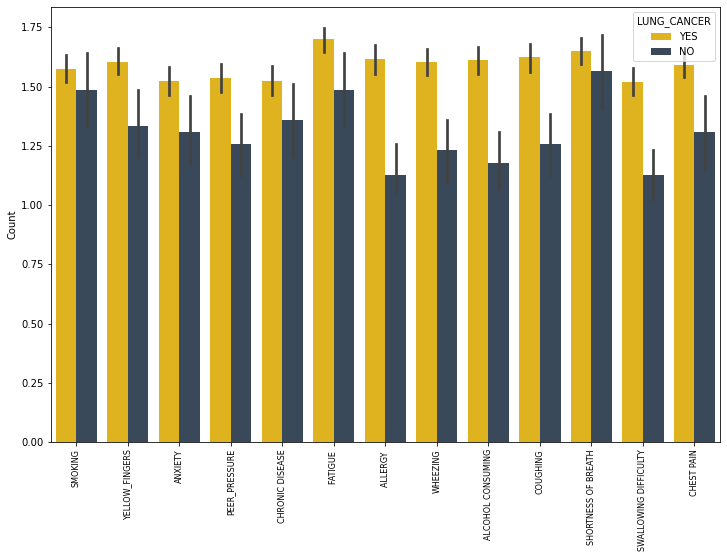

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Load data and drop irrelevant columns
df = pd.read_csv('survey lung cancer.csv')
df_no_age_gender = df.drop(['AGE', 'GENDER'], axis=1)

# Perform ANOVA
columns = list(df_no_age_gender.columns)
columns.remove('LUNG_CANCER')
p_values = {}
for col in columns:
    x = df_no_age_gender[df_no_age_gender['LUNG_CANCER'] == 0][col]
    y = df_no_age_gender[df_no_age_gender['LUNG_CANCER'] == 1][col]
    _, p_val = f_oneway(x, y)
    p_values[col] = p_val

# Sort variables by difference between means
diff_means = {}
for col in columns:
    x = df_no_age_gender[df_no_age_gender['LUNG_CANCER'] == 0][col]
    y = df_no_age_gender[df_no_age_gender['LUNG_CANCER'] == 1][col]
    diff_means[col] = abs(x.mean() - y.mean())

sorted_diff_means = sorted(diff_means.items(), key=lambda x: x[1], reverse=True)

# Plot results
melted_df = df_no_age_gender.melt(id_vars=['LUNG_CANCER'], var_name='variable', value_name='value')
melted_df = melted_df[melted_df['variable'] != 'AGE']
melted_df = melted_df[melted_df['variable'] != 'GENDER']
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=melted_df, x='variable', y='value', hue='LUNG_CANCER', palette=['#FFC300', '#34495E'])
ax.set_xlabel('')
ax.set_ylabel('Count')
ax.tick_params(axis='x', labelrotation=90, labelsize=8)



plt.show()


Text(0, 0.5, 'Count')

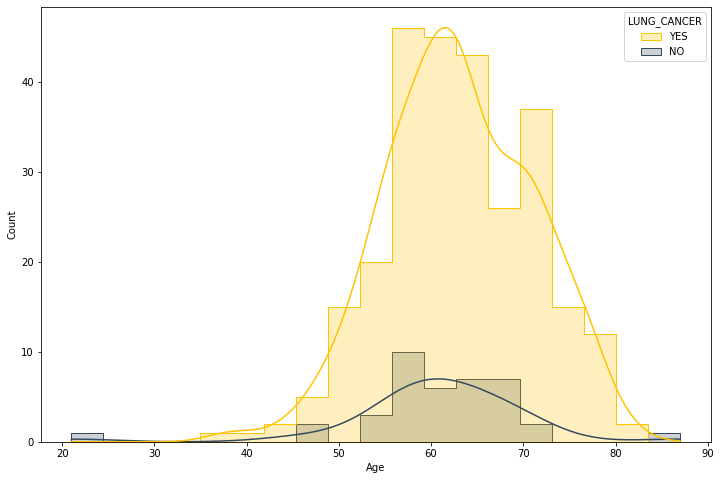

In [4]:
# Create a new dataframe with all columns except 'age'
df_new = df.drop('AGE', axis=1)

# Convert the 'LUNG_CANCER' column to '+' or '-'
df_new['LUNG_CANCER'] = df_new['LUNG_CANCER'].apply(lambda x: '+' if x==1 else '-')

# Melt the dataframe to make it suitable for plotting
df_new = df_new.melt(id_vars=['LUNG_CANCER'], var_name='Variable', value_name='Value')

# Set the order of variables based on the number of unique values
order = df_new.drop('LUNG_CANCER', axis=1).apply(pd.Series.nunique).sort_values(ascending=False).index


# Create a barplot for 'age'
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(data=df, x='AGE', hue='LUNG_CANCER', palette=['#FFC300', '#34495E'], element='step', kde=True)
ax.set_xlabel('Age')
ax.set_ylabel('Count')


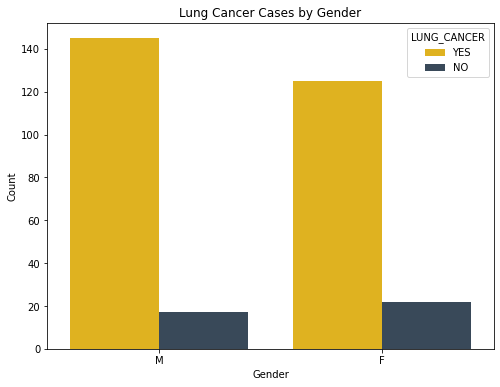

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('survey lung cancer.csv')

# Plot barplot
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='GENDER', hue='LUNG_CANCER', data=df, palette=['#FFC300', '#34495E'])
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Lung Cancer Cases by Gender')
plt.show()


In [6]:
df = pd.read_csv('survey lung cancer.csv')

# Factorize categorical values
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = pd.factorize(df[column])[0]

# Drop all NA or missing values
df.dropna(inplace=True)
print(df.columns)

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')


In [7]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Load data and drop irrelevant columns
df = pd.read_csv('survey lung cancer.csv')

# Factorize categorical values
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = pd.factorize(df[column])[0]

# Drop all NA or missing values
df.dropna(inplace=True)
print(df.head())

df = df[['ALCOHOL CONSUMING', 'COUGHING', 'SWALLOWING DIFFICULTY', 'AGE', 'LUNG_CANCER']]

# Split data into input and output
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model on testing data
loss, accuracy = model.evaluate(X_test, y_test)
print("Testing loss: {:.4f}\nTesting accuracy: {:.4f}".format(loss, accuracy))


   GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       0   69        1               2        2              1   
1       0   74        2               1        1              1   
2       1   59        1               1        1              2   
3       0   63        2               2        2              1   
4       1   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0                    2               

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
import itertools

# Define the list of features
features = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
            'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ',
            'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING',
            'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']

# Load data and factorize categorical values
df = pd.read_csv('survey lung cancer.csv')
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = pd.factorize(df[column])[0]

# Drop all NA or missing values
df.dropna(inplace=True)

# Define the output column
output_col = 'LUNG_CANCER'

# Define the number of features to select
num_features = 3

# Initialize variables to store the best combination of features and its accuracy
best_features = None
best_accuracy = 0

# Loop over all combinations of features and train/evaluate the neural network model
for combination in itertools.combinations(features, num_features):
    # Select the features and the output column
    selected_cols = list(combination) + [output_col]
    selected_df = df[selected_cols]

    # Split data into input and output
    X = selected_df.iloc[:, :-1].values
    y = selected_df.iloc[:, -1].values

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Feature scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Create and train the neural network model
    model = Sequential()
    model.add(Dense(16, input_dim=num_features, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Evaluate the model on testing data and update the best combination of features
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    if accuracy > best_accuracy:
        best_features = list(combination)
        best_accuracy = accuracy

# Print the best combination of features and its accuracy
print("Best combination of features: {}".format(best_features))
print("Best testing accuracy: {:.4f}".format(best_accuracy))


Best combination of features: ['YELLOW_FINGERS', 'ALCOHOL CONSUMING', 'COUGHING']
Best testing accuracy: 0.9355
